Logistic Regression Neural Network

In [9]:
# Import needed dependencies
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers, models
import csv
import os
from datetime import datetime

In [10]:
# Read in the data:

# Loading Fashion MNIST dataset from TensorFlow datasets
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load training and testing dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
# Normalize pixel values of images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check shape of dataset
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [12]:
# Defining label names for Fashion MNIST dataset to check images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
#Flatten input images
train_images = train_images.reshape(train_images.shape[0], 28 * 28)
test_images = test_images.reshape(test_images.shape[0], 28 * 28)


In [14]:
#define simple logistic regression neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,))
])


In [15]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7395 - loss: 0.7755
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8385 - loss: 0.4680
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8505 - loss: 0.4358
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.8535 - loss: 0.4232
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.8546 - loss: 0.4172
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.8608 - loss: 0.4082
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8589 - loss: 0.4075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.8638 - loss: 0.3952
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.8629 - loss: 0.3948
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.8635 - loss: 0.3918


In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8526 - loss: 0.4301
Test accuracy: 0.847100019454956


In [20]:
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.84      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.71      0.78      0.74      1000
       Dress       0.83      0.87      0.85      1000
        Coat       0.76      0.71      0.73      1000
      Sandal       0.96      0.92      0.94      1000
       Shirt       0.63      0.57      0.60      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.96      0.94      0.95      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


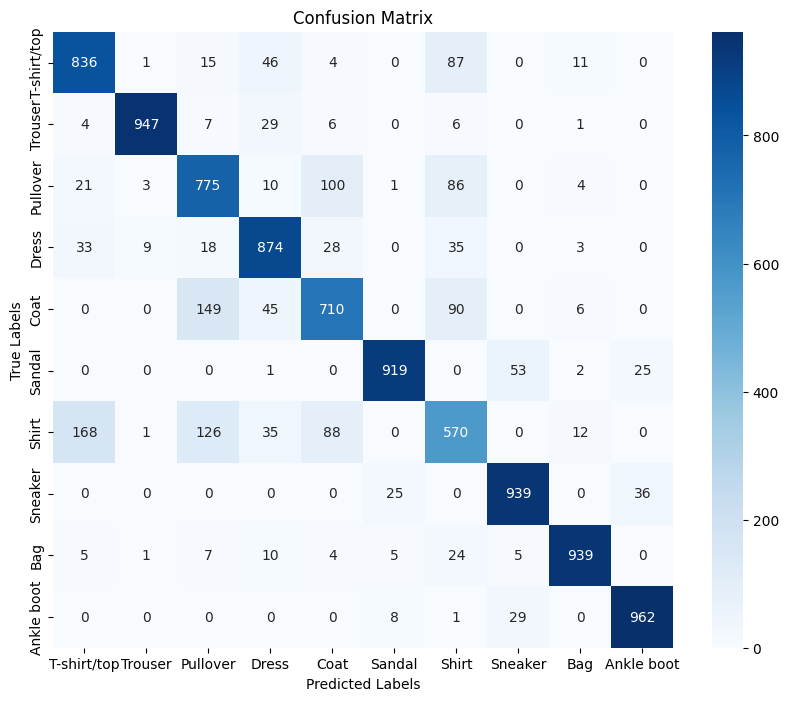

In [19]:
# Get predictions and convert to class labels
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Define a custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred, k=3):
    return tf.keras.metrics.sparse_top_k_categorical_accuracy(y_true, y_pred, k=k)

# Recompile model with top-k accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', lambda y_true, y_pred: top_k_accuracy(y_true, y_pred, k=3)])

# Evaluate again to include top-k accuracy
results = model.evaluate(test_images, test_labels)
print(f"Top-3 Accuracy: {results[2]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8526 - lambda: 0.9836 - loss: 0.4301
Top-3 Accuracy: 0.9815000295639038
